In [ ]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import Sequential, Model
from tensorflow.keras.layers import Input, Conv2D, Conv2DTranspose, MaxPooling2D, Dense
from tensorflow.keras.layers import Dropout, Flatten, Activation, BatchNormalization, concatenate, add, Add
from tensorflow.keras import backend as K
from tensorflow import keras
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.utils import to_categorical

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# download the dataset
(_, _), (x_test, _) = cifar10.load_data()
x_test = x_test[:1000]

170508288/170498071 [==============================] - 2s 0us/step


In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

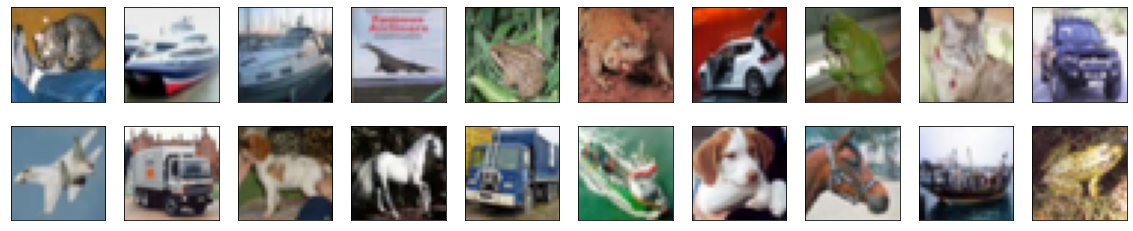

In [ ]:
# Show some training images
fig = plt.figure(figsize=(20, 4))

for idx in np.arange(20):
  ax = fig.add_subplot(2, 10, idx+1, xticks=[], yticks=[])
  plt.imshow(x_test[idx])

In [ ]:
#print("Number of Training Samples: ", len(x_train))
print("Number of Test Samples: ", len(x_test))

Number of Test Samples:  1000


In [ ]:
#train_labels = to_categorical(train_labels, 10)
#test_labels = to_categorical(test_labels, 10)
#print(y_train.shape)
#print(y_test.shape)

In [ ]:
# change data type
#x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [ ]:
# normalize data into range 1-0
#x_train /= 255.0
x_test /= 255.0

In [ ]:
#print("Training shape: ", x_train.shape)
print("Testing shape: ", x_test.shape)

Testing shape:  (1000, 32, 32, 3)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pickle
d_fgsm = open('./drive/My Drive/Defense_Method/adv_examples/dense_net/spa.pickle', 'rb')
d_fgsm = pickle.load(d_fgsm)

In [ ]:
d_fgsm = d_fgsm.numpy()
d_fgsm.shape

(1000, 32, 32, 3)

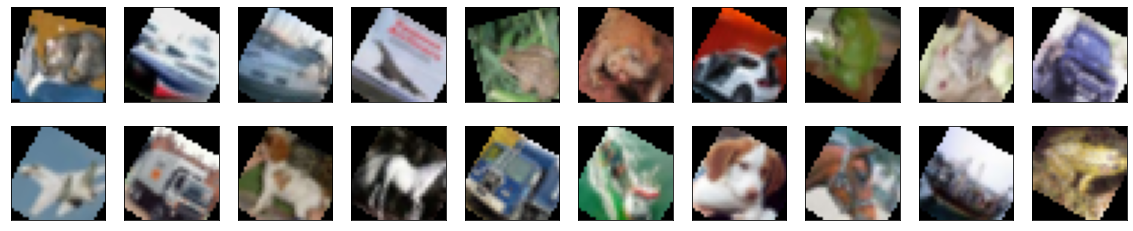

In [ ]:
# show some training images
fig = plt.figure(figsize = (20, 4))

for idx in range(20):
  ax = fig.add_subplot(2, 10, idx + 1, xticks = [], yticks = [])
  plt.imshow(np.clip(d_fgsm[idx], 0, 1))

In [ ]:
inputs = Input(shape = (32, 32, 3))
x = inputs

# downsampling 
c32 = Conv2D(filters = 128, kernel_size = (3, 3), padding = 'same', strides = 1)(x)
c32 = tf.keras.layers.LeakyReLU()(c32)
c32 = Conv2D(filters = 128, kernel_size = (3, 3), padding = 'same', strides = 1)(c32)
c32 = tf.keras.layers.LeakyReLU()(c32)
p16 = Conv2D(filters = 128, kernel_size = (3, 3), padding = 'same', strides = 2)(c32)
p16 = tf.keras.layers.LeakyReLU()(p16)
p16 = BatchNormalization()(p16)

c16 = Conv2D(filters = 256, kernel_size = (3, 3), padding = 'same', strides = 1)(p16)
c16 = tf.keras.layers.LeakyReLU()(c16)
c16 = Conv2D(filters = 256, kernel_size = (3, 3), padding = 'same', strides = 1)(c16)
c16 = tf.keras.layers.LeakyReLU()(c16)
p8 = Conv2D(filters = 256, kernel_size = (3, 3), padding = 'same', strides = 2)(c16)
p8 = tf.keras.layers.LeakyReLU()(p8)
p8 = BatchNormalization()(p8)

c8 = Conv2D(filters = 512, kernel_size = (3, 3), padding = 'same', strides = 1)(p8)
c8 = tf.keras.layers.LeakyReLU()(c8)
c8 = Conv2D(filters = 512, kernel_size = (3, 3), padding = 'same', strides = 1)(c8)
c8 = tf.keras.layers.LeakyReLU()(c8)
p4 = Conv2D(filters = 512, kernel_size = (3, 3), padding = 'same', strides = 2)(c8)
p4 = tf.keras.layers.LeakyReLU()(p4)
p4 = BatchNormalization()(p4)

c4 = Conv2D(filters = 1024, kernel_size = (3, 3), padding = 'same', strides = 1)(p4)
c4 = tf.keras.layers.LeakyReLU()(c4)
c4 = Conv2D(filters = 1024, kernel_size = (3, 3), padding = 'same', strides = 1)(c4)
c4 = tf.keras.layers.LeakyReLU()(c4)
p2 = Conv2D(filters = 1024, kernel_size = (3, 3), padding = 'same', strides = 2)(c4)
p2 = tf.keras.layers.LeakyReLU()(p2)
p2 = BatchNormalization()(p2)

# upsampling
t4 = Conv2DTranspose(filters = 1024, kernel_size = (3, 3), padding = 'same', strides = 2)(p2)
con4 = concatenate([t4, p4])
u4 = Conv2D(filters = 512, kernel_size = (3, 3), padding = 'same', strides = 1)(con4)
u4 = tf.keras.layers.LeakyReLU()(u4)
u4 = Conv2D(filters = 512, kernel_size = (3, 3), padding = 'same', strides = 1)(u4)
u4 = tf.keras.layers.LeakyReLU()(u4)
u4 = Conv2D(filters = 512, kernel_size = (3, 3), padding = 'same', strides = 1)(u4)
u4 = tf.keras.layers.LeakyReLU()(u4)
u4 = BatchNormalization()(u4)

t8 = Conv2DTranspose(filters = 512, kernel_size = (3, 3), padding = 'same', strides = 2)(u4)
con8 = concatenate([t8, p8])
u8 = Conv2D(filters = 256, kernel_size = (3, 3), padding = 'same', strides = 1)(con8)
u8 = tf.keras.layers.LeakyReLU()(u8)
u8 = Conv2D(filters = 256, kernel_size = (3, 3), padding = 'same', strides = 1)(u8)
u8 = tf.keras.layers.LeakyReLU()(u8)
u8 = Conv2D(filters = 256, kernel_size = (3, 3), padding = 'same', strides = 1)(u8)
u8 = tf.keras.layers.LeakyReLU()(u8)
u8 = BatchNormalization()(u8)

t16 = Conv2DTranspose(filters = 256, kernel_size = (3, 3), padding = 'same', strides = 2)(u8)

con16 = concatenate([t16, p16])
u16 = Conv2D(filters = 128, kernel_size = (3, 3), padding = 'same', strides = 1)(con16)
u16 = tf.keras.layers.LeakyReLU()(u16)
u16 = Conv2D(filters = 128, kernel_size = (3, 3), padding = 'same', strides = 1)(u16)
u16 = tf.keras.layers.LeakyReLU()(u16)
u16 = Conv2D(filters = 128, kernel_size = (3, 3), padding = 'same', strides = 1)(u16)
u16 = tf.keras.layers.LeakyReLU()(u16)
u16 = BatchNormalization()(u16)

t32 = Conv2DTranspose(filters = 128, kernel_size = (3, 3), padding = 'same', strides = 2)(u16)

u32 = Conv2D(filters = 64, kernel_size = (3, 3), padding = 'same', strides = 1)(t32)
u32 = tf.keras.layers.LeakyReLU()(u32)
u32 = Conv2D(filters = 64, kernel_size = (3, 3), padding = 'same', strides = 1)(u32)
u32 = tf.keras.layers.LeakyReLU()(u32)
u32 = Conv2D(filters = 64, kernel_size = (3, 3), padding = 'same', strides = 1)(u32)
u32 = tf.keras.layers.LeakyReLU()(u32)
u32 = BatchNormalization()(u32)


u32 = Conv2D(filters = 3, kernel_size = (1, 1), padding = 'same', strides = 1)(u32)
outputs = tf.clip_by_value(add([tf.constant(0.03)*u32, inputs]), 0, 1)
#outputs = tf.keras.layers.LeakyReLU()(outputs)

model = Model(inputs = inputs, outputs = outputs)
model.summary()

Model: "model_6"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_7 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 conv2d_150 (Conv2D)            (None, 32, 32, 128)  3584        ['input_7[0][0]']                
                                                                                                  
 leaky_re_lu_150 (LeakyReLU)    (None, 32, 32, 128)  0           ['conv2d_150[0][0]']             
                                                                                                  
 conv2d_151 (Conv2D)            (None, 32, 32, 128)  147584      ['leaky_re_lu_150[0][0]']        
                                                                                            

In [ ]:
model_path = './drive/My Drive/Defense_Method/models/runet_spa.h5'
checkpoint = ModelCheckpoint(model_path, 
                             monitor= "val_loss", 
                             verbose=1, 
                             save_best_only=True, 
                             mode= "auto", 
                             save_weights_only = False)

early = EarlyStopping(monitor= "val_loss", 
                      mode= "auto", 
                      patience = 20)

callbacks_list = [checkpoint, early]

In [ ]:
# compiles model
model.compile(optimizer = 'adam', loss = 'mse')

In [ ]:
model.fit(d_fgsm, x_test,
          batch_size = 50,
          epochs = 400,
          validation_data = (d_fgsm, x_test),
          callbacks = callbacks_list)

Epoch 1/400
20/20 [==============================] - ETA: 0s - loss: 0.0680
Epoch 00001: val_loss improved from inf to 0.27555, saving model to ./drive/My Drive/Defense_Method/models/runet_spa.h5


/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


20/20 [==============================] - 21s 935ms/step - loss: 0.0680 - val_loss: 0.2756
Epoch 2/400
20/20 [==============================] - ETA: 0s - loss: 0.0467
Epoch 00002: val_loss improved from 0.27555 to 0.22291, saving model to ./drive/My Drive/Defense_Method/models/runet_spa.h5
20/20 [==============================] - 14s 736ms/step - loss: 0.0467 - val_loss: 0.2229
Epoch 3/400
20/20 [==============================] - ETA: 0s - loss: 0.0374
Epoch 00003: val_loss improved from 0.22291 to 0.08918, saving model to ./drive/My Drive/Defense_Method/models/runet_spa.h5
20/20 [==============================] - 17s 860ms/step - loss: 0.0374 - val_loss: 0.0892
Epoch 4/400
20/20 [==============================] - ETA: 0s - loss: 0.0318
Epoch 00004: val_loss improved from 0.08918 to 0.06689, saving model to ./drive/My Drive/Defense_Method/models/runet_spa.h5
20/20 [==============================] - 17s 864ms/step - loss: 0.0318 - val_loss: 0.0669
Epoch 5/400
20/20 [=====================

No handles with labels found to put in legend.


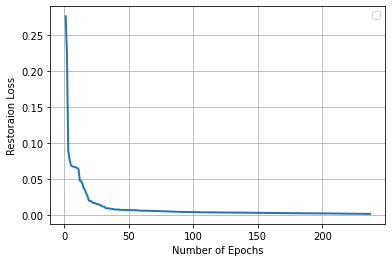

In [ ]:
val_loss = model.history.history['val_loss']

epochs = range(1, len(val_loss) + 1)
val_loss.sort(reverse=True)
line1 = plt.plot(epochs, val_loss)
plt.setp(line1, linewidth = 2, markersize=10)
plt.xlabel('Number of Epochs') 
plt.ylabel('Restoraion Loss')
plt.grid(True)
plt.legend()
plt.show()


In [ ]:
model = tf.keras.models.load_model('./drive/My Drive/Defense_Method/models/runet_spa.h5')

In [ ]:
output_images = model.predict(d_fgsm)

In [ ]:
#output_images = np.clip(fgsm, 0, 1)

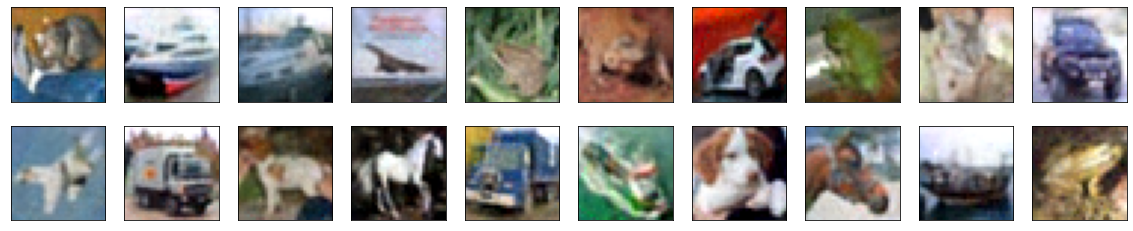

In [ ]:
fig = plt.figure(figsize=(20, 4))

for idx in np.arange(20):
  ax = fig.add_subplot(2, 10, idx+1, xticks=[], yticks=[])
  plt.imshow(np.clip(output_images[idx], 0, 1))

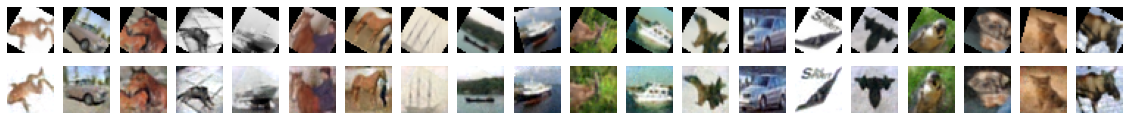

In [ ]:
# Display
grid_col = 20
grid_row = 2


f, axarr = plt.subplots(grid_row, grid_col, figsize=(grid_col, grid_row))

i = 0
for row in range(0, grid_row, 2):
    for col in range(grid_col):
        idx = np.random.randint(0, 1000)      
        axarr[row,col].imshow(np.clip(d_fgsm[idx], 0, 1))
        axarr[row,col].axis('off')
        axarr[row+1,col].imshow(np.clip(output_images[idx], 0, 1))
        axarr[row+1,col].axis('off')        
        i += 1

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


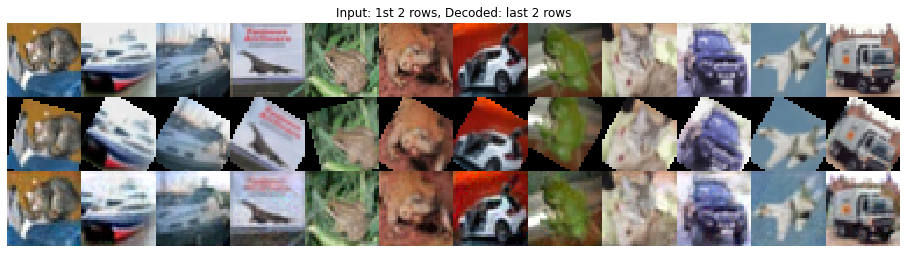

In [ ]:
# display the 1st 8 test input and decoded images
imgs = np.concatenate([x_test[:12], d_fgsm[:12], output_images[:12]])
imgs = imgs.reshape((3, 12, 32, 32, 3))

imgs = np.vstack([np.hstack(i) for i in imgs])
plt.figure(figsize = (16, 6))
plt.axis('off')
plt.title('Input: 1st 2 rows, Decoded: last 2 rows')
plt.imshow(imgs, interpolation='none')